# 📧 Spam Email Detection using Machine Learning

## Project Overview
This project aims to classify emails as **Spam** or **Not Spam (Ham)**
using Natural Language Processing (NLP) and Machine Learning techniques.

The model learns patterns from email text data and predicts whether
a given email is spam or legitimate.


## Problem Statement
Email spam causes security risks and productivity loss.
The objective of this project is to build an automated system
that accurately detects spam emails using text classification.


### Import Required Libraries 

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Text preprocessing
import re
import string

# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset

In [3]:
# Loading the spam email dataset
# Dataset contains two columns: 'label' and 'message'
data = pd.read_csv("spam_ham_dataset.csv", encoding='latin-1')

# Display first 5 rows
data.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
data.shape


(5171, 4)

In [5]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='str')

## Dataset Cleaning
We remove unnecessary columns, rename headers,
and convert labels into numerical format for modeling.


In [7]:
# Keeping only required columns
data = data[['text', 'label_num']]

# Renaming columns for consistency
data.columns = ['message', 'label']

data.head()


,message,label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


## Text Preprocessing
This step removes:
- Special characters
- Punctuation
- Numbers
- Converts text to lowercase


### Text Cleaning Function

In [109]:
def clean_text(text):
    """
    Cleans input text by removing punctuation,
    numbers, and converting it to lowercase.
    """
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text


### Apply Text Cleaning

In [110]:
# Applying text cleaning to all messages
data['message'] = data['message'].apply(clean_text)

data.head()


,message,label
0,subject enron methanol meter \r\nthis is a ...,0
1,subject hpl nom for january \r\n see attache...,0
2,subject neon retreat\r\nho ho ho we re aroun...,0
3,subject photoshop windows office cheap mai...,1
4,subject re indian springs\r\nthis deal is to ...,0


## Feature Extraction using TF-IDF
TF-IDF converts text data into numerical vectors
based on word importance.


In [115]:

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1, 2)
)

# ✅ FIT on training text
X = tfidf.fit_transform(data['message'])
y = data['label']


### Train-Test Split

In [116]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Training
We use **Multinomial Naive Bayes**, which works well
for text classification problems.


In [117]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)

model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

### Testing

In [118]:
def predict_email(email_text):
    email_vector = tfidf.transform([email_text])
    prediction = model.predict(email_vector)[0]
    return "🚨 Spam Email" if prediction == 1 else "✅ Not Spam"


In [ ]:
email = """
WIN FREE CASH NOW!!!
Click the link to claim your prize.
Limited time offer. Act fast!!!
"""

print(predict_email(email))


🚨 Spam Email


In [104]:
# Check prediction distribution
y_pred = model.predict(X_test)
print(pd.Series(y_pred).value_counts())


0    720
1    315
Name: count, dtype: int64


### Model Evaluation

In [91]:
# Predicting on test data
y_pred = model.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9420289855072463
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       742
           1       0.87      0.93      0.90       293

    accuracy                           0.94      1035
   macro avg       0.92      0.94      0.93      1035
weighted avg       0.94      0.94      0.94      1035



### Confusion Matrix

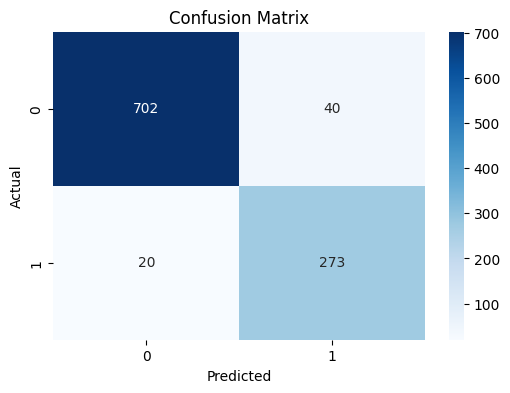

In [92]:
# Visualizing confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Conclusion
- Built an effective spam email classifier
- Used NLP and Machine Learning techniques
- Achieved high accuracy using Naive Bayes
- Model can be extended for real-world email filtering
